In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
baseline=pd.read_csv('baseline_clean_df.csv')
log=pd.read_csv('logistic_regression_trained_on_outside.csv')

In [3]:
def get_first(x):
    return x.split("'")[1]
def encoder(x):
    if x.lower()=='joy':
        return 0
    elif x.lower()=='sad':
        return 1
    elif x.lower()=='surprise':
        return 2
    elif x.lower()=='fear':
        return 3
    elif x.lower=='disgust':
        return 4
    else:
        return 5
baseline['emotion']=baseline['Emotion'].apply(get_first)
log['emotion_cluster']=log['predict'].apply(encoder)
numls=['scene_avg_p', 'scene_avg_a', 'scene_avg_d',
       'scene_avg_blur', 'scene_avg_optical_flow']

In [4]:
rols=['Unnamed: 0','scene_avg_p', 'scene_avg_a', 'scene_avg_d',
       'scene_avg_blur', 'scene_avg_optical_flow']

Line plot for features

Text(0.5, 1.0, 'avg_blur')

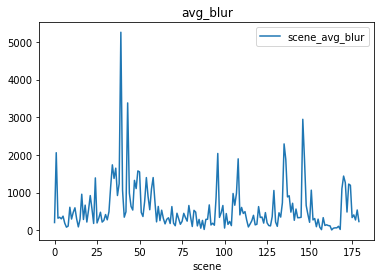

In [11]:
baseline[['scene_avg_blur']].plot()
plt.xlabel('scene')
plt.title('avg_blur')

Text(0.5, 1.0, 'avg_PAD')

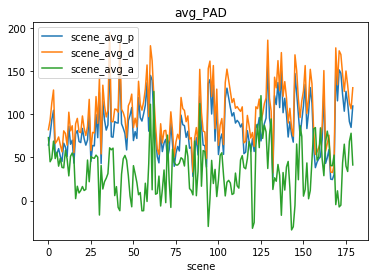

In [12]:
baseline[['scene_avg_p', 'scene_avg_d', 'scene_avg_a']].plot()
plt.xlabel('scene')
plt.title('avg_PAD')

avg_p is average pleasure, avg_d is average dominance, avg_a is averge arousal

Text(0.5, 1.0, 'avg_optical_flow')

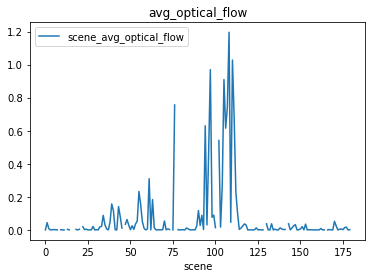

In [15]:
baseline[['scene_avg_optical_flow']].plot()
plt.xlabel('scene')
plt.title('avg_optical_flow')

Histgoram of each features

Text(0.5, 0, 'avg_optical_flow')

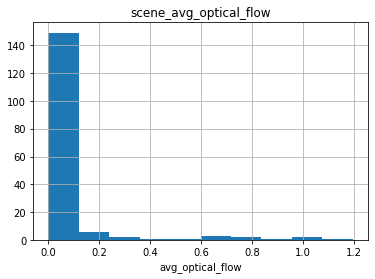

In [30]:
baseline[['scene_avg_optical_flow']].hist()
plt.xlabel('avg_optical_flow')

Text(0.5, 0, 'avg_pleasure')

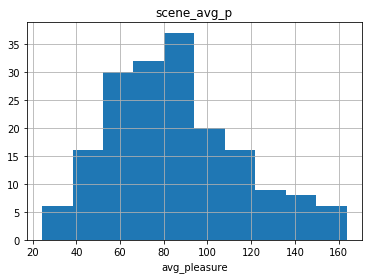

In [29]:
baseline[['scene_avg_p']].hist()
plt.xlabel('avg_pleasure')

Text(0.5, 0, 'avg_blur')

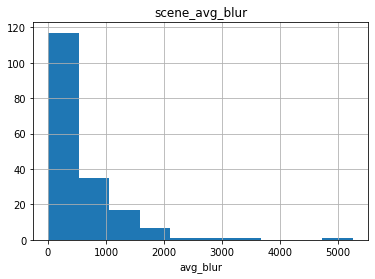

In [28]:
baseline[['scene_avg_blur']].hist()
plt.xlabel('avg_blur')

Text(0.5, 0, 'avg_dominance')

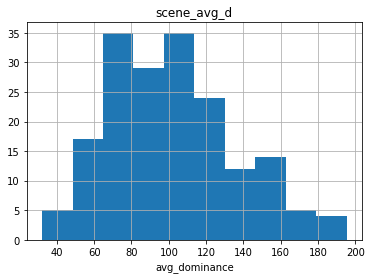

In [31]:
baseline[['scene_avg_d']].hist()
plt.xlabel('avg_dominance')

Text(0.5, 0, 'avg_arousal')

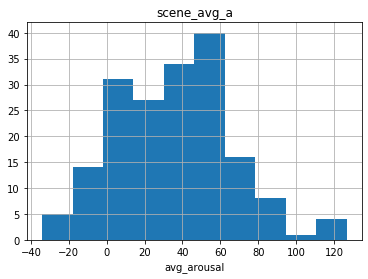

In [32]:
baseline[['scene_avg_a']].hist()
plt.xlabel('avg_arousal')

visualize emotion changes

rerank of our emotion, making that happier emotions get higher scores

In [12]:
def get_rank(x):
    emscore={}
    emscore['joy']=5
    emscore['surprise']=4
    emscore['sad']=3
    emscore['disgust']=2
    emscore['anger']=1
    emscore['fear']=0
    return emscore[x.split("'")[1].lower()]*0.6+emscore[x.split("'")[3].lower()]*0.3+emscore[x.split("'")[5].lower()]*0.1

In [14]:
ploter=baseline[['scene_movie', 'Emotion']]
ploter['ranker']=ploter['Emotion'].apply(get_rank)

C:\Users\YihengYe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
movies=ploter['scene_movie'].unique()


Text(0.5, 1.0, 'big_hero_6')

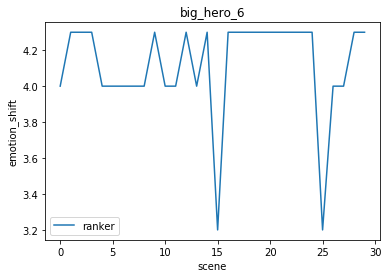

In [23]:
sl1=ploter[ploter['scene_movie']==movies[0]].reset_index()
sl1[['ranker']].plot()
plt.xlabel('scene')
plt.ylabel('emotion_shift')
plt.title(movies[0])

Text(0.5, 1.0, 'cars_3')

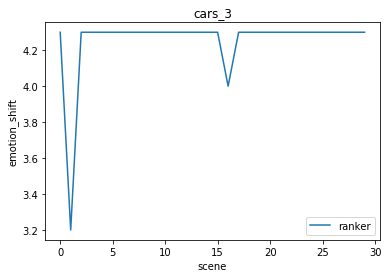

In [24]:
sl2=ploter[ploter['scene_movie']==movies[1]].reset_index()
sl2[['ranker']].plot()
plt.xlabel('scene')
plt.ylabel('emotion_shift')
plt.title(movies[1])

Text(0.5, 1.0, 'incredible_2')

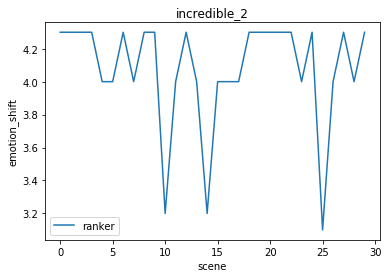

In [25]:
sl3=ploter[ploter['scene_movie']==movies[2]].reset_index()
sl3[['ranker']].plot()
plt.xlabel('scene')
plt.ylabel('emotion_shift')
plt.title(movies[2])

Text(0.5, 1.0, 'toy_story_4')

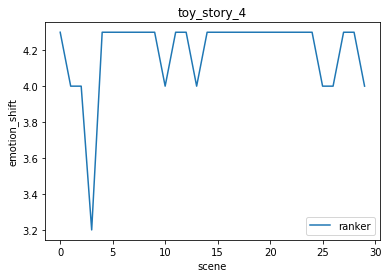

In [26]:
sl4=ploter[ploter['scene_movie']==movies[3]].reset_index()
sl4[['ranker']].plot()
plt.xlabel('scene')
plt.ylabel('emotion_shift')
plt.title(movies[3])

Text(0.5, 1.0, 'up')

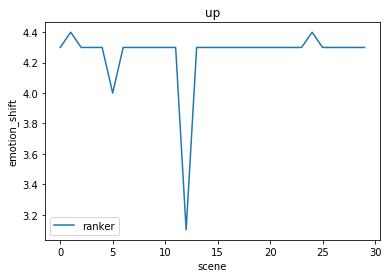

In [27]:
sl5=ploter[ploter['scene_movie']==movies[4]].reset_index()
sl5[['ranker']].plot()
plt.xlabel('scene')
plt.ylabel('emotion_shift')
plt.title(movies[4])

Text(0.5, 1.0, 'wall_e_')

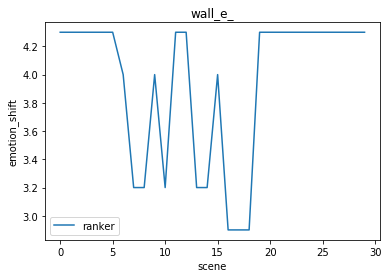

In [28]:
sl6=ploter[ploter['scene_movie']==movies[5]].reset_index()
sl6[['ranker']].plot()
plt.xlabel('scene')
plt.ylabel('emotion_shift')
plt.title(movies[5])

Some stats groupby movies:

In [17]:
numdf2=log.drop(['predict', 'emotion_cluster'], axis=1)

In [20]:
numdf2.groupby('scene_movie').mean()

,scene_avg_p,scene_avg_a,scene_avg_d,scene_avg_blur,scene_avg_optical_flow
scene_movie,,,,,
big_hero_6,69.257722,39.951352,84.183492,460.885642,0.004825
cars_3,95.184971,21.719709,112.009275,1173.280825,0.048813
incredible_2,72.636551,38.717727,87.936714,305.694960,0.049380
toy_story_4,88.053817,30.353011,104.758193,491.155222,0.309847
up,96.371533,38.839275,115.278433,686.101881,0.008049
wall_e_,88.987489,42.153594,107.144932,399.754346,0.006766


In [19]:
numdf2.groupby('scene_movie').max()

,scene_name,scene_avg_p,scene_avg_a,scene_avg_d,scene_avg_blur,scene_avg_optical_flow
scene_movie,,,,,,
big_hero_6,big_hero_69,104.689522,72.981351,128.197153,2058.214860,0.044003
cars_3,cars_39,163.632920,61.172539,195.204988,5255.479130,0.232639
incredible_2,incredible_29,145.156260,126.587839,179.546329,656.606464,0.755713
toy_story_4,toy_story_49,140.287836,68.247325,161.740315,2037.561794,1.195580
up,up9,157.959511,121.647637,186.010694,2944.690295,0.037222
wall_e_,wall_e_9,154.245262,84.614697,177.070653,1437.663826,0.051978


above tables show mean values and max values about every status for each movie

Emotion frequency in baseline model for each movie:

In [24]:
basenum=baseline[['emotion', 'scene_movie']]
basenum.groupby(['scene_movie', 'emotion']).size()

scene_movie   emotion 
big_hero_6    Joy         17
              Surprise    13
cars_3        Joy         28
              Surprise     2
incredible_2  Joy         16
              Surprise    14
toy_story_4   Joy         22
              Surprise     8
up            Joy         28
              Surprise     2
wall_e_       Joy         19
              Surprise    11
dtype: int64